# Author: Faolán Hamilton
## Project Description: Analyse the planning applications submitted to Clare County Council over the past year 
### Source - https://planning.geohive.ie/datasets/housinggovie::irishplanningapplications/explore?layer=0&showTable=true

# Strategy
- Filter the dataset to only Clare County Council (>500,000 records down to 11,000)
- Filter the dataset to only the past year (2025 inclusive ~ 1,000)
- Filter out unneccessary headings 

## Clean-up
- Eircode out of address using regex
- Can I use commas  to determine a townland for address and group by settlement?

# Potential Questions:
- How many of the planning applications are granted?
- Determine a type for each (Residential, commercial etc.)
- Number of residential units 

In [1]:
#Modules to import 

import datetime as dt

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IrishPlanningApplications_-505265856342584481.csv")

In [3]:
headers = df.columns.tolist()
headers

['OBJECTID',
 'Planning Authority',
 'Application Number',
 'Development Description',
 'Development Address',
 'Development Postcode',
 'ITMEasting',
 'ITMNorthing',
 'Application Status',
 'Application Type',
 'Applicant Forename',
 'Applicant Surname',
 'Applicant Address',
 'Decision',
 'Land Use Code',
 'AreaofSite',
 'NumResidentialUnits',
 'One-Off House',
 'FloorArea',
 'ReceivedDate',
 'WithdrawnDate',
 'DecisionDate',
 'DecisionDueDate',
 'GrantDate',
 'ExpiryDate',
 'Appeal Reference Number',
 'Appeal Status',
 'Appeal Decision',
 'AppealDecisionDate',
 'AppealSubmittedDate',
 'FIRequestDate',
 'FIRecDate',
 'Link Application Details',
 'One-Off KPI',
 'ETL_DATE',
 'Site Id',
 'ORIG_FID',
 'x',
 'y']

In [4]:
#remove the headers that are not relevant
drop_col_list = ['OBJECTID','Planning Authority','ITMEasting','ITMNorthing','Applicant Forename','Applicant Surname','Applicant Address','WithdrawnDate','GrantDate','ExpiryDate','Appeal Reference Number','Link Application Details','AppealSubmittedDate','FIRequestDate','FIRecDate', 'Appeal Status', 'Site Id', 'ETL_DATE', 'ORIG_FID']
df.drop(columns=drop_col_list, inplace=True)
df.head(1)

,Application Number,Development Description,Development Address,Development Postcode,Application Status,Application Type,Decision,Land Use Code,AreaofSite,NumResidentialUnits,One-Off House,FloorArea,ReceivedDate,DecisionDate,DecisionDueDate,Appeal Decision,AppealDecisionDate,One-Off KPI,x,y
0,2560001,of the development which consists of: a) Alt...,"Ardcloony , Killaloe , Co. Clare",NaN,APPLICATION FINALISED,RETENTION,CONDITIONAL,NaN,0.932,0,NaN,0.0,1/2/2025 12:00:00 AM,4/9/2025 12:00:00 AM,4/9/2025 12:00:00 AM,NaN,NaN,No,-943599.469305,6.942243e+06


In [5]:
df['ReceivedDate']

0       1/2/2025 12:00:00 AM
1       1/3/2025 12:00:00 AM
2       1/6/2025 12:00:00 AM
3       1/6/2025 12:00:00 AM
4       1/6/2025 12:00:00 AM
               ...          
990    11/5/2025 12:00:00 AM
991    11/6/2025 12:00:00 AM
992    11/6/2025 12:00:00 AM
993    11/6/2025 12:00:00 AM
994    11/6/2025 12:00:00 AM
Name: ReceivedDate, Length: 995, dtype: object

In [6]:
#https://stackoverflow.com/questions/38067704/how-to-change-the-datetime-format-in-pandas
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#https://sqlpey.com/python/solved-how-to-change-the-datetime-format-in-pandas/
received_dateformat = pd.to_datetime(df.ReceivedDate)
received_dateformat.dt.strftime('%d/%m/%Y')

/tmp/ipykernel_65850/2063671229.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  received_dateformat = pd.to_datetime(df.ReceivedDate)


0      02/01/2025
1      03/01/2025
2      06/01/2025
3      06/01/2025
4      06/01/2025
          ...    
990    05/11/2025
991    06/11/2025
992    06/11/2025
993    06/11/2025
994    06/11/2025
Name: ReceivedDate, Length: 995, dtype: object

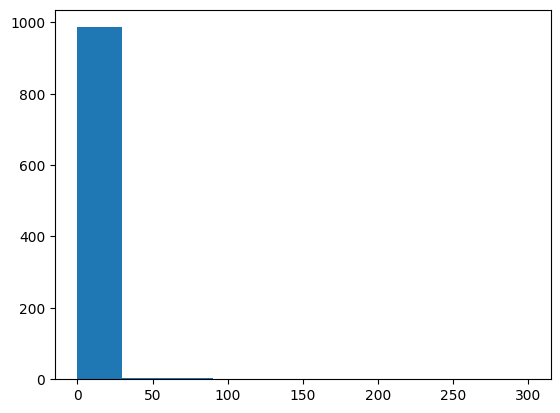

In [7]:
x = df['NumResidentialUnits']
plt.hist(x)
plt.show()